# Lesson 3: Data Wrangling and Visualization

Today we're going to work on wrangling and visualizing data. We will be exploring the packages we've learned about earlier in this course: Pandas, NumPy, Matplotlib, and Seaborn.

We'll begin by importing the packages we need.

## Exercise 1 

Import each of the packages mentioned above.  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Exercise 2

Import the 2016 City Service Request data we used in lesson 2. Use the os package to set the working directory.

In [2]:
serv = pd.read_csv('https://opendata.arcgis.com/datasets/0e4b7d3a83b94a178b3d1f015db901ee_7.csv',
                  encoding= 'utf-8')

## Exercise 3 

Take a look at the data using some of the techniques you learned last week, including shape, head, and describe.

In [3]:
serv.shape

(302985, 30)

In [5]:
serv.head()

,X,Y,OBJECTID,SERVICECODE,SERVICECODEDESCRIPTION,SERVICETYPECODEDESCRIPTION,ORGANIZATIONACRONYM,SERVICECALLCOUNT,ADDDATE,RESOLUTIONDATE,...,XCOORD,YCOORD,LATITUDE,LONGITUDE,CITY,STATE,ZIPCODE,MARADDRESSREPOSITORYID,WARD,DETAILS
0,-77.068472,38.959221,928367,EMNPV,Emergency No-Parking Verification,PEMA- Parking Enforcement Management Administr...,DPW,1,2016-01-04T16:45:21.000Z,2016-01-04T21:13:04.000Z,...,394065.60,143480.700000,38.959214,-77.068470,WASHINGTON,DC,20015.0,262895.0,3.0,NaN
1,-77.028858,38.903745,947826,S0276,Parking Meter Repair,Transportation Operations Administration,DDOT,1,2016-05-02T11:43:31.000Z,2016-05-03T01:38:10.000Z,...,397497.09,137320.600003,38.903738,-77.028856,WASHINGTON,DC,20005.0,812754.0,2.0,Need More Information
2,-77.019418,38.941567,947827,S0361,Sidewalk Repair,Toa-Street & Bridge Maintenance,DDOT,1,2016-05-02T11:47:49.000Z,NaN,...,398316.79,141518.950000,38.941560,-77.019416,WASHINGTON,DC,20011.0,247564.0,4.0,NaN
3,-77.014655,38.906236,947828,PRUNING,Tree Pruning,Urban Forrestry,DDOT,1,2016-05-02T10:44:23.000Z,2017-01-19T11:03:08.000Z,...,398729.12,137596.790000,38.906229,-77.014652,WASHINGTON,DC,20001.0,238344.0,6.0,"By BANUA, SIMOUN: 5/2/2016 12:48:15 PM\nthis t..."
4,-77.004008,38.835935,947829,S0031,Bulk Collection,SWMA- Solid Waste Management Admistration,DPW,1,2016-05-02T11:49:49.000Z,2016-05-12T14:27:19.000Z,...,399652.25,129792.780000,38.835928,-77.004005,WASHINGTON,DC,20032.0,66302.0,8.0,w riggans collected bulk on 5/12/16*closed by ...


In [6]:
serv.describe().T

,count,mean,std,min,25%,50%,75%,max
X,302985.0,-7.701344e+01,0.037492,-77.114209,-7.703655e+01,-7.701731e+01,-7.698978e+01,-7.690953e+01
Y,302985.0,3.891196e+01,0.031257,38.813455,3.889461e+01,3.890972e+01,3.893308e+01,3.899544e+01
OBJECTID,302985.0,1.335995e+06,102371.072802,928367.000000,1.264323e+06,1.340839e+06,1.417109e+06,1.566462e+06
SERVICECALLCOUNT,302985.0,1.000000e+00,0.000000,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
INSPECTORNAME,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
XCOORD,302985.0,3.988348e+05,3251.499740,390097.460000,3.968295e+05,3.984992e+05,4.008872e+05,4.078484e+05
YCOORD,302985.0,1.382333e+05,3470.000502,127297.420000,1.363069e+05,1.379835e+05,1.405768e+05,1.475002e+05
LATITUDE,302985.0,3.891195e+01,0.031258,38.813448,3.889460e+01,3.890968e+01,3.893306e+01,3.899544e+01
LONGITUDE,302985.0,-7.701344e+01,0.037491,-77.114206,-7.703655e+01,-7.701731e+01,-7.698977e+01,-7.690976e+01
ZIPCODE,302983.0,2.002962e+04,867.804543,-1865.000000,2.000300e+04,2.001100e+04,2.001800e+04,7.073900e+04


Recall that last week we saw that date variables are stored as object data types in Pandas Data Frames.

However, we CAN turn them in to datetime types using Pandas's nifty datetime commands.

Let's begin by converting the service order date into a new datetime column in our DataFrame called "request_date".

In [8]:
serv['request_date'] = pd.to_datetime(serv['SERVICEORDERDATE'])

With any datetime object, we can use dt to pull the particulare date time that we're interested in.

Here we use the value_counts function to look at the data by month.

In [9]:
serv.request_date.dt.month.value_counts()

1     34542
8     29892
9     26935
6     26253
7     25881
5     24289
10    24236
3     23892
4     23725
2     21541
11    20990
12    20809
Name: request_date, dtype: int64

Notice that January is the month in which the city received the most service requests. However, the other top months for service requests are all summer months, and our winter months (December, November, February) are those with the least service requests. Does January seem to be an anomaly? Let's look closer.

The value_counts function returns to pieces of information: the values, which are the actual counts of rows or observations, and the index, which the values are grouped by. In this case, the index is the set of months and the values are the number of service requests each month. The value_counts function returns an output that is sorted by the values, but we can also sort by the index using the sort_index function. 

In [11]:
serv.request_date.dt.month.value_counts().sort_index()

1     34542
2     21541
3     23892
4     23725
5     24289
6     26253
7     25881
8     29892
9     26935
10    24236
11    20990
12    20809
Name: request_date, dtype: int64

It may be helpful to plot this output to help us visualize the number of service requests made throughout the year.

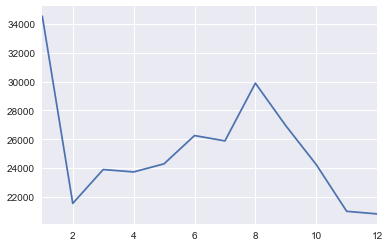

In [13]:
%matplotlib inline
requests_per_month = serv.request_date.dt.month.value_counts()
requests_per_month.sort_index().plot()

We can see that January does, indeed, look anomalous. After spiking in January, service requests are low throughout the winter months, increasing as we move into the warmer months and peaking in August, after which they dip down again as we return to winter. 

Let's take a look at what's happening in January. We can focus in on January by selecting the subset of our service requests that came in January. 

In [15]:
jan_requests = serv[serv.request_date.dt.month==1]
print(jan_requests.request_date.min())
print(jan_requests.request_date.max())

2016-01-01 00:30:30
2016-01-31 23:43:20


Here, we've fed Python a logical statement telling it to return values from df where the date-part month in the column 'request_date' is equal to 1 (or January).

## Exercise 4

To better understand how this works, try taking the command out of the square brackets and running it. What does it return?

In [16]:
serv.request_date.dt.month==1

0          True
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13         True
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23         True
24        False
25        False
26        False
27        False
28        False
29        False
          ...  
302955    False
302956    False
302957    False
302958    False
302959    False
302960    False
302961    False
302962    False
302963    False
302964    False
302965    False
302966    False
302967    False
302968    False
302969    False
302970    False
302971    False
302972    False
302973    False
302974    False
302975    False
302976    False
302977    False
302978    False
302979    False
302980    False
302981    False
302982    False
302983    False
302984    False
Name: request_date, dtyp

This returns a string of True and False statements. The 'True' values are the ones the DataFrame keeps, and the 'False' ones, it discards. 

Now that we have the January data, let's look at what kinds of requests were being made in January.

## Exercise 5

Get value counts for the service code description from the subsample of January service requests. What where the most common requests?

In [17]:
jan_requests.SERVICECODEDESCRIPTION.value_counts()

Snow/Ice Removal                                        5347
Residential Snow Removal (ServeDC)                      5278
Sidewalk Shoveling Enforcement Exemption                5266
Snow/Ice Removal (Roadways AND Bridge walkways ONLY)    2768
Bulk Collection                                         2352
Parking Enforcement                                     2079
Parking Meter Repair                                    1997
Snow Removal Complaints for Sidewalks                   1030
Streetlight Repair Investigation                         817
Emergency No-Parking Verification                        558
Pothole                                                  543
Trash Collection - Missed                                444
Sanitation Enforcement                                   372
Residential Parking Permit Violation                     357
Abandoned Vehicle - On Public Property                   324
Alley Cleaning                                           309
DMV - Drivers License/ID

The city received a TON of snow removal requests in January 2016, but received very few other requests. It seems that these requests for snow removal are driving the high number of requests in January.


If you were living in the District in January 2016, you'll remember this was the month that Snowzilla hit the city. This was a record-breaking snowstorm that dumped feet of snow on the city from January 22nd to January 23rd. 

Let's take a look at the top request in January, Snow/Ice Removal.

## Exercise 6

Get the subsample of service requests for Snow/Ice Removal. Get the number of requests for each day in January 2016, then plot those requests so we can look at them over the course of the month. 

In [51]:
snow_req = jan_requests[jan_requests.SERVICECODEDESCRIPTION== 'Snow/Ice Removal']

In [52]:
snow_req.request_date.dt.day.value_counts()

25    1983
24    1123
26    1049
27     322
28     194
21     161
23     159
29     145
20      86
30      65
31      25
22      22
18       5
6        3
19       2
17       1
13       1
5        1
Name: request_date, dtype: int64

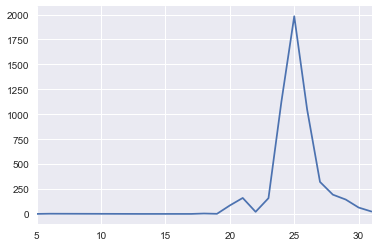

In [53]:
cont = snow_req.request_date.dt.day.value_counts()
cont[:].sort_index().plot()

We can see that almost all of the requests for snow and ice removal came in the days following Snowzilla.

Now let's take a look at WHERE those requests were coming from. DC is organized into 8 wards. These wards are the largest political geographies in the District. Each ward has a representative on the District Council who is elected directly by the residents of that ward. 

## Exercise 7

Get the number of requests for snow and ice removal from each of the wards in January 2016.

In [54]:
wrd = snow_req.WARD.value_counts()
wrd

7.0    1145
8.0     838
5.0     830
4.0     802
3.0     617
6.0     414
1.0     405
2.0     268
Name: WARD, dtype: int64

By far, the most requests for snow and ice removal came from Ward 7, while the fewest (almost a thousand fewer) came from Ward 2. 

Now let's take a look at response times. Ward 7 had the most requests, but is that an indication that the city was slower to plot roads in Ward 7 than it was in other wards?

## Exercise 8

Create a new date column from the resolution date column in our DataFrame of requests for snow and ice removal in January.

In [55]:
snow_req.RESOLUTIONDATE = pd.to_datetime(snow_req.RESOLUTIONDATE)

C:\Users\CDL\Anaconda3\lib\site-packages\pandas\core\generic.py:2773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Because the resolution date comes AFTER the service request, the resolution date will always be 'greater' than the request date. We can get the amount of time took the city to respond to each service request by taking the difference between the resolution date and the request date.

## Exercise 9

Subtract the request date from the resolution date and assign that to an object called "time_diff". Print time_diff.

In [73]:
snow_req.time_diff =  snow_req.RESOLUTIONDATE - snow_req.request_date

Great! Now let's convert time_diff to the number of hours it took to respond using the astype function. This function can be used to change the data type of a column. The timedelta64 function lets us convert to the datetime part we're interested in.

In [74]:
snow_req['response_time'] = time_diff.astype('timedelta64[h]')

C:\Users\CDL\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


## Exercise 10

Create a new column in our DataFrame calls "response_time" that is the time difference between resolution date and request date in hours. 

In [75]:
snow_req.head().T

,107,202,212,219,220
X,-76.987,-76.9981,-77.0404,-77.0336,-76.9963
Y,38.8562,38.9463,38.9229,38.9242,38.9507
OBJECTID,1054320,1075996,1076006,1076021,1076022
SERVICECODE,SRC02,SRC02,SRC02,SRC02,SRC02
SERVICECODEDESCRIPTION,Snow/Ice Removal,Snow/Ice Removal,Snow/Ice Removal,Snow/Ice Removal,Snow/Ice Removal
SERVICETYPECODEDESCRIPTION,SNOW,SNOW,SNOW,SNOW,SNOW
ORGANIZATIONACRONYM,DPW,DPW,DPW,DPW,DPW
SERVICECALLCOUNT,1,1,1,1,1
ADDDATE,2016-01-29T14:44:49.000Z,2016-01-23T14:44:07.000Z,2016-01-23T15:55:39.000Z,2016-01-25T08:21:21.000Z,2016-01-25T08:22:08.000Z
RESOLUTIONDATE,2016-01-31 06:32:15,2016-01-28 02:33:33,2016-01-29 00:22:46,2016-01-28 23:16:37,2016-01-28 02:10:55


Now that we have our response times, let's use the groupby function to get the average response time by ward.

In [108]:
i= snow_req.groupby('WARD')
i['response_time'].mean().sort_values() #Why are my outputs negative?

WARD
5.0   -113.878313
6.0    -96.661836
7.0    -95.990393
4.0    -77.349127
8.0    -71.335322
3.0    -64.063209
1.0    -63.298765
2.0    -58.750000
Name: response_time, dtype: float64

This looks a lot like the output from the value_counts function. In fact, value_counts is a type of groupby function that simply returns counts for each of the unique values in a column. 

The groupby function allows us to aggregate the data by the unique values of a column (or multiple columns) and return various statistics, including mean, median, minimum (min), maximum (max), counts, etc.

Again, we have two parts to the output: the index, in this case the ward, and the values, in this case the average hours it to the city to respond to a request for snow and ice removal. The groupby function returns the values sorted by the index. However, we can sort the values by the value using the sort_values function. 

## Exercise 11

Get the average response times by ward again and sort the values by the average response time in ascending order (from highest to lowest). Which ward had the longest response times? Which had the lowest?

In [111]:
___

WARD
5.0   -113.878313
6.0    -96.661836
7.0    -95.990393
4.0    -77.349127
8.0    -71.335322
3.0    -64.063209
1.0    -63.298765
2.0    -58.750000
Name: response_time, dtype: float64

Now we know which wards made the most requests for snow and ice removal following the historic snowstorm in January 2016. Why do you think some wards received faster service than others? Do you think you could build a model predicting which requests would receive the fastest response?

In [112]:
#I did build a model predicting response time in assignment 2, however it was not very good,
# according to my accuracy scores. If you have any advice for improving it I'd apprecaite that.
# I'll spend more time on my model if I can.